<a href="https://colab.research.google.com/github/pbcquoc/vietocr/blob/master/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




# Inference

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

# from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [5]:
pip install gdown

  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/00/45/ec3407adf6f6b5bf867a4462b2b0af27597a26bd3cd6e2534cb6ab029938/filelock-3.12.2-py3-none-any.whl.metadata
  Using cached filelock-3.12.2-py3-none-any.whl.metadata (2.7 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
Using cached filelock-3.12.2-py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install -r vietocr/requirement.txt
!pip install -U scikit-image

  Using cached einops-0.2.0-py2.py3-none-any.whl (18 kB)


In [2]:
pip install torch

  Using cached torch-1.13.1-cp37-cp37m-win_amd64.whl (162.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install torchvision


  Using cached torchvision-0.14.1-cp37-cp37m-win_amd64.whl (1.1 MB)


In [7]:
config = Cfg.load_config_from_name('vgg_transformer')

SSLError: HTTPSConnectionPool(host='vocr.vn', port=443): Max retries exceeded with url: /data/vietocr/config/base.yml (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1045)')))

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [3]:
config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cpu'

In [4]:
detector = Predictor(config)

d:\CodeRepo\PTIT\GraduationThesis\VietOCR2\vietocr\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\CodeRepo\PTIT\GraduationThesis\VietOCR2\vietocr\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Model weight C:\Users\ngoch\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


In [5]:
! wget https://vocr.vn/data/vietocr/sample.zip
! unzip  -qq -o sample.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
! ls sample | shuf |head -n 5

'ls' is not recognized as an internal or external command,
operable program or batch file.


'VŨ THUỲ NINH'

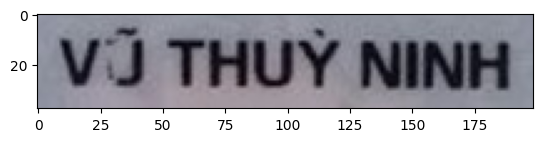

In [7]:
img = './sample/031189003299.jpeg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

'Liên này lới Luffento mico tổ Cập học từa Tiên'

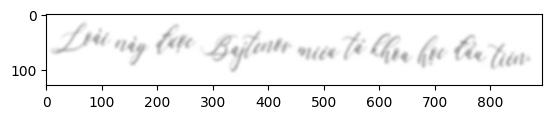

In [8]:
img = './sample/Loài này được Bajtenov miêu tả khoa học đầu tiên..jpg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

'phong chuon có ngữ tiên đấp người làm ông hị ban kitom'

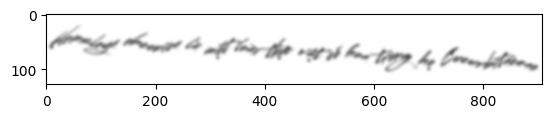

In [9]:
img = './sample/Hemsleya obconica là một loài thực vật có hoa trong họ Cucurbitaceae.jpg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

'Vichronodespative land loai huon tritongho Geometife.'

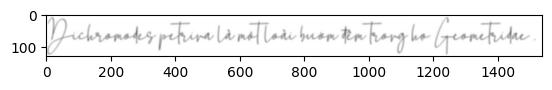

In [10]:

img = './sample/Dichromodes petrina là một loài bướm đêm trong họ Geometridae..jpg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

'valea tolteca Là một loài thực vật có hoa trong họ đậu'

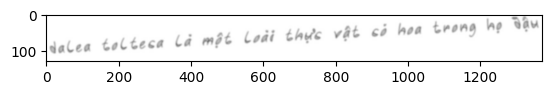

In [11]:
img = './sample/Dalea tolteca là một loài thực vật có hoa trong họ Đậu.jpg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

'CON TRƯƠNG THÀNH BAY TỪ CUỐI THÁNG Y ĐẾN THÁNG 7'

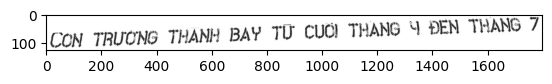

In [12]:
img = './sample/Con trưởng thành bay từ cuối tháng 4 đến tháng 7.jpg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Download sample dataset

In [13]:
! wget https://vocr.vn/data/vietocr/data_line.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
! unzip -qq -o ./data_line.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [15]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [16]:
config = Cfg.load_config_from_name('vgg_transformer')

In [17]:

dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cpu'

you can change any of these params in this full list below

In [18]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cpu',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 20000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': './data_line/',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annotation.txt',
  'image_height': 32,
  'image_min_width': 32,
 

You should train model from our pretrained 

In [19]:
trainer = Trainer(config, pretrained=True)

d:\CodeRepo\PTIT\GraduationThesis\VietOCR2\vietocr\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\CodeRepo\PTIT\GraduationThesis\VietOCR2\vietocr\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model weight C:\Users\ngoch\AppData\Local\Temp\vgg_transformer.pth exsits. Ignore download!


Error: train_hw: There is not enough space on the disk.


Save model configuration for inference, load_config_from_file

In [ ]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

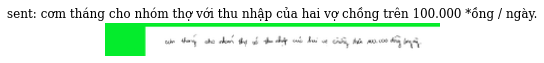

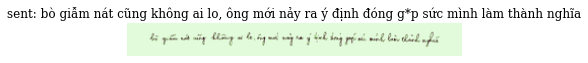

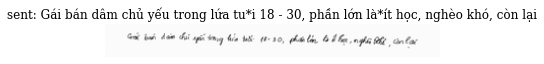

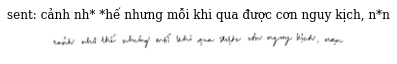

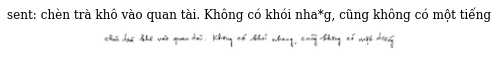

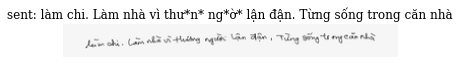

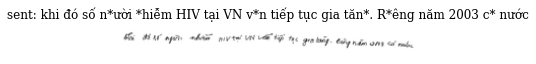

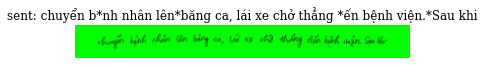

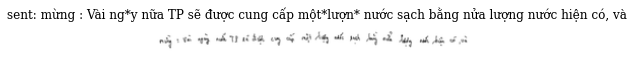

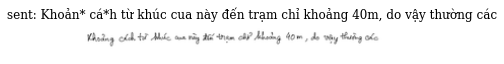

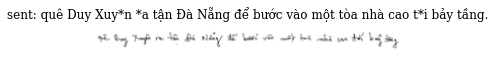

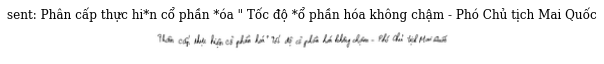

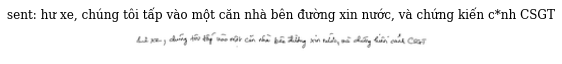

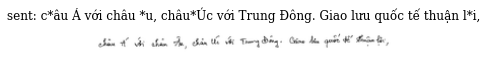

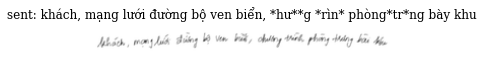

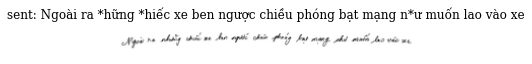

In [ ]:
trainer.visualize_dataset()

Train now

In [ ]:
trainer.train()

iter: 000200 - train loss: 1.593 - lr: 1.91e-05 - load time: 1.86 - gpu time: 86.34


KeyboardInterrupt: ignored

Visualize prediction from our trained model


In [ ]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()